Understanding the pytorch

In [1]:
import torch

x = torch.tensor([5,7])

y = torch.tensor([7,5])

print(x*y)

tensor([35, 35])


In [2]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [3]:
x.shape

torch.Size([2, 5])

In [4]:
y =  torch.rand([2,5])
y

tensor([[0.9318, 0.2359, 0.3332, 0.8654, 0.9409],
        [0.9946, 0.6270, 0.7395, 0.1140, 0.7348]])

In [5]:
y.view([1,10])

tensor([[0.9318, 0.2359, 0.3332, 0.8654, 0.9409, 0.9946, 0.6270, 0.7395, 0.1140,
         0.7348]])

Importing the data 

In [6]:
import torch
import torchvision
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [8]:
trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)

In [9]:
for data in trainsets:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0], data[1][0]
print(y)

tensor(2)


In [11]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


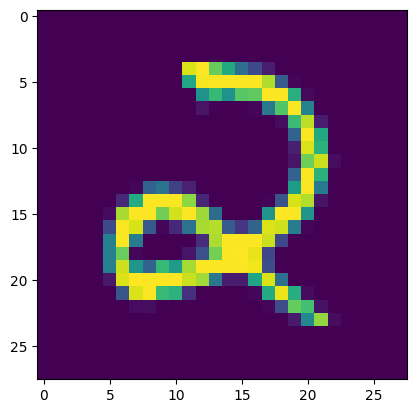

In [12]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [13]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainsets:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [14]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Building the neural network

In [15]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)


In [16]:
import torch.nn as nn
import torch.nn.functional as F


In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear( 28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [19]:
ouput = net(X)
print(ouput)

tensor([[-2.4243, -2.3391, -2.2510, -2.2553, -2.3045, -2.3772, -2.2463, -2.3034,
         -2.4038, -2.1524]], grad_fn=<LogSoftmaxBackward0>)


Training Model


In [20]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainsets:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.1506, grad_fn=<NllLossBackward0>)
tensor(0.0122, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)


In [34]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainsets:   
        X, y = data
        output = net(X.view(-1, 28*28))    
        for idx, i in enumerate(output):   
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


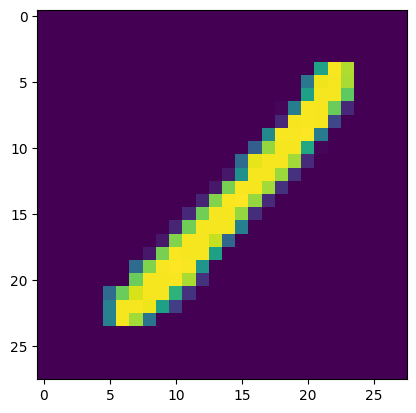

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [37]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(1)


Convolutional Neural Networks

In [ ]:
import os 
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA =  True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}

    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:        # iterate over the labels(Directories)
            print(label)
            for f in os,os.listdir(label):     # iterate over the files in the directories
            
                path = os.path.join(label, f)
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


    

